# Introduction to Python

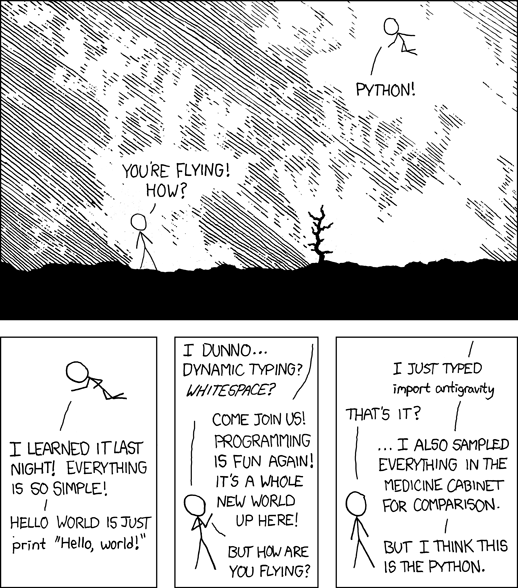

Python is an interpreted programming language. The emphasis behind Python is code readability and syntax which allows to write concepts in less lines of code.
 - **Note:** It is considered "good" Python style to use underscores (e.g., variable naming). Personally, I think that is nonsense - underscores are a "bottom-five" character from my perspective and if I can avoid using them I will (camel case is my preference). Your personal style is up to you, but just be aware that if/when you work with others on large projects in python, "python purists" (yes they exist...) will throw a tantrum if you don't use underscores. Anyway, you will see both styles in the coming notebooks.

# Python Data Types

**Numbers:**

In [1]:
5
print(5)

a = 12 #let's assign a number to a variable

#let's make sure addition works as expected
print(a + 1) 
print(a + 3.1)

5
13
15.1


Irrational numbers - using math (or numpy) 

In [2]:
import math

print("What is e? e = {}".format(math.e))
print("What is pi? pi = {}".format(math.pi))

What is e? e = 2.718281828459045
What is pi? pi = 3.141592653589793


**Strings:** String operations in Python are very fast (much faster than in R)

In [3]:
myString = "a" + "bc"
print(myString)

abc


**Lists:** For those unfamilar with python lists, you can think of them as a cross between an array and a linked list. In python they are extremely flexible structures that can store multiple types and are mutable.

In [4]:
myList = [123, 'someString', 4.5] #Let's define a list of an int, a string, and a float
print(len(myList)) #How long is our list?

print(myList)
print(myList[0])
print(myList[0:3])

3
[123, 'someString', 4.5]
123
[123, 'someString', 4.5]


How do I add things to these so called lists? Well the .append() method will be your friend.

In [5]:
myList.append("Four is clearly a terrible number")

What is I want to put to lists together?

In [6]:
megaList = myList + ["cinco", 6, "seven"]
megaList

[123,
 'someString',
 4.5,
 'Four is clearly a terrible number',
 'cinco',
 6,
 'seven']

Getting elements from a list --> Python like many programming languages (not you R!!!) is 0-indexed. To grab an element from a list, you can just pass in it's 0-indexed location:

In [7]:
print(megaList[0])
print(megaList[5])

123
6


**Dictionaries:** Dictionaries are an invaluable structure that you will use constantly. They essentially serve as a mapping from one thing to another. They have very fast lookup times, which is great when you need to pull a value from particular keys! Moreover, they are built on python's flexible typing so we can have multiple types in our dictionary.

In [8]:
myDictionary = {"apple": "Fuji" , "seafood" : False, "three": "prime", "seven": 7}
myDictionary["apple"]

'Fuji'

Let's add an element to our dictionary:

In [9]:
myDictionary["workout"] = "burpees"
print(myDictionary)

{'apple': 'Fuji', 'seafood': False, 'three': 'prime', 'seven': 7, 'workout': 'burpees'}


 - **Note:** An "improvement" over the dictionary is the defaultdict which you can import from collections. For example if I am mapping a key to a count a `defaultdict(int)` avoids key initialization and we can simply initialize and up the count at the same time!

**Tuples**: Tuples are similar to lists but immutable (i.e., things can't be changed after construction)

In [10]:
myTuple = (4,3,2,1)
print(myTuple)
print(myTuple.index(3))

myOtherTuple = (7,8,9)
print(myOtherTuple.index(9))

(4, 3, 2, 1)
1
2


What happens if we try to change things to our  immutable tuple?

In [11]:
myTuple[0] = 7

TypeError: 'tuple' object does not support item assignment

**Question:** In the event I absolutely needed to add an element to my tuple or make a change, how do you think we would go about this?

_Hint_ : Since tuples are immutable we need to overwrite it

In [12]:
#1) Try to change the first element of myTuple to be 7
#2) Try to add 5 to the myTuple (such that the last element is now 5)

# Python Packages

Python has good default capabilities but the real advantage comes from its extremely powerful packages. Two of the packages you will use most frequently are: 1) Pandas 2) numpy (We'll focus primarily on pandas today).

To use these packages though we need to import them:

In [13]:
import pandas as pd  # used generally for mixed data types
import numpy as np  # used generally for pure numeric matrices

In [14]:
data_dir = '/oasis/tscc/scratch/mstp2020/'

'''
 Use the pandas read_csv function to read in your data. Make sure the
 file name matches what your data is called on tscc and it is located in 
 the folder that you have defined as data_dir. Here we are going to link to 
 an already cleaned feature counts table (which you will independently 
 generate tomorrow).
 
 You can use the comment parameter to specify the character that comment lines start with as
 we don't want to read those in. If you want to set a particular column as your index you 
 can use the index_col = n, parameter. For example if we wanted to index by Geneid we 
 could do the following:
        
 counts = pd.read_table(data_dir+"all_counts.txt", comment="#", index_col=0)
'''

# For now let's do a simple file read-in without any of these parameters
counts = pd.read_csv(data_dir + "counts_for_deseq2.csv")

Great I've loaded the data into python, but what does it look like? Well 2 high-level commands that are going to be your go-to's are .shape and .head(). The former gives the dimension of your data, while the latter gives you a preview of your data. Ok let's use these to take a look at things:

In [15]:
print(counts.shape)
counts.head()

(57820, 6)


,Geneid,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_1_ATCACGAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_2_CGATGTAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_1_CAGATCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_2_CCGTCCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_3_GTGAAAAligned.out.sorted.bam
0,ENSG00000223972.4,0,0,0,0,0
1,ENSG00000227232.4,16,19,44,38,61
2,ENSG00000243485.2,0,0,0,0,0
3,ENSG00000237613.2,0,0,0,0,0
4,ENSG00000268020.2,0,0,0,0,0


What if I have a columns/rows I don't need - how do I delete them? Well in those cases, the drop() method is going to be your friend. The input is a list of row/column indexes and an axis. Axis = 0 corresponds to rows and axis = 1 corresponds to columns. Let's try this out now by trying to drop the GeneID column.

In [16]:
countsOnly = counts.drop(['Geneid'], axis = 1)
print(countsOnly.shape) #notice how the shape has changed! We have one less column
countsOnly.head()

(57820, 5)


,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_1_ATCACGAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DMSO_2_CGATGTAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_1_CAGATCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_2_CCGTCCAligned.out.sorted.bam,/home/ucsd-train58/scratch/testing/star_alignment/DTP_3_GTGAAAAligned.out.sorted.bam
0,0,0,0,0,0
1,16,19,44,38,61
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


Our column names are rather tedious - so let's rename them. To do that we can use the rename function which takes as input a **dictionary**. To change column names we pass in the dictionary to the _columns_ paramater. However if we wanted to rename rows we would pass in the _index_ parameter.

In [17]:
# Keep in mind that you can enter to a new line whenever you are inside of a parenthesis
# or brackets without breaking your command. This makes your code easier to read. Rename
# all the columns that you want to, and assign that output to a variable called counts.
# Also rather than typing out the column names we can grab them from a call to the current
# dataframe column names.

counts = counts.rename(columns={counts.columns[1]:"Parental1",
                               counts.columns[2]:"Parental2",
                               counts.columns[3]:"Persister1",
                               counts.columns[4]:"Persister2",
                               counts.columns[5]:"Persister3"})

counts.head()

,Geneid,Parental1,Parental2,Persister1,Persister2,Persister3
0,ENSG00000223972.4,0,0,0,0,0
1,ENSG00000227232.4,16,19,44,38,61
2,ENSG00000243485.2,0,0,0,0,0
3,ENSG00000237613.2,0,0,0,0,0
4,ENSG00000268020.2,0,0,0,0,0


**Try it yourself:** Try changing the names of rows 0,2, and 4 to something else.

In [4]:
#Try it yourself here!

# Reading and Writing Files

To write to a file you have to create a file object to which you write. After you finish writing, make sure you close yor file object or else it's easy for the output to get corrupted.

In [19]:
f = open('testingTestingTesting.txt', 'w')
f.write('This\n')
f.write('Is\n')
f.write('A\n')
f.write('Test!\n')
f.close()

What if we want to read a file:

In [20]:
f = open('testingTestingTesting.txt', 'r')
myTest = f.read()
print(myTest)

myParsedFile = myTest.split() #The default separator is any whitespace character such as space, \t, \n, etc.
print(myParsedFile)

This
Is
A
Test!

['This', 'Is', 'A', 'Test!']


While read is convenient it is usually recommended to read line-by-line.

In [21]:
f = open('testingTestingTesting.txt', 'r')
myOtherParsedFile = []
for line in f:
    myOtherParsedFile.append(line.split()[0])
        
print(myOtherParsedFile)

['This', 'Is', 'A', 'Test!']


# Python: A Whole Lot More...

There is sooooo much more to python, such as including a wide range of machine learning ad statistical libraries that make your life as a data scientist/bioinformatician much easier! Rather than taking too much time delving into other libraries or focusing on programming basics such as loops, methods, etc. lets focus on one more commonly used python feature - list comprehensions. List comprehensions allow us to compress our code in a succinct and easy to read way.

Let's do a comparison. **Without list comprehension** initialize a list to have the numbers 1-13:

In [22]:
basic = list()
for i in range(1,14):
    basic.append(i)
basic

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Now let's do the same thing **with a list comprehension**:

In [23]:
comprehensionIsTheKeyToUnderstanding = [i for i in range(1,14)]
comprehensionIsTheKeyToUnderstanding

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]